# DSC680

## Janine Par 

In [2]:
import numpy as np  
import pandas as pd  
import numpy as np  


#import sys
#from operator import itemgetter

#import first
#import thinkstats2

import json
import datetime
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 800)


# Business Data

### Get the Gym Membership data

In [3]:
gym_df=pd.read_csv('gym_members_exercise.csv',  encoding='latin-1')  

In [34]:
gym_df.shape

(973, 15)

In [4]:
gym_df.head(200)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808,Cardio,29.7,2.7,3,1,30.07


In [5]:
def df_missing_cols (df, name):
    for c in df.columns:
            is_missing=df[c].isna().sum()
            if is_missing > 0:
                print ("dataframe {} column {} has {} missing values (s)". format (name,c,is_missing))


In [6]:
df_missing_cols(gym_df,'gym_members')

In [19]:
gym_df.isna().sum().any()

False

In [35]:
#Check for nulls
gym_df.columns[gym_df.isna().any()].tolist()

[]

In [39]:
gym_df.duplicated().sum()

0

In [4]:
gym_df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [44]:
gym_df.dtypes

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                    int64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

In [36]:
numeric_cols = gym_df.columns.tolist() 
numeric_cols

['Age',
 'Gender',
 'Weight (kg)',
 'Height (m)',
 'Max_BPM',
 'Avg_BPM',
 'Resting_BPM',
 'Session_Duration (hours)',
 'Calories_Burned',
 'Workout_Type',
 'Fat_Percentage',
 'Water_Intake (liters)',
 'Workout_Frequency (days/week)',
 'Experience_Level',
 'BMI']

In [38]:
categorical = gym_df.select_dtypes(exclude=np.number)
numerical = gym_df.select_dtypes(include=np.number)
numerical.head ()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,88.3,1.71,180,157,60,1.69,1313,12.6,3.5,4,3,30.20
1,46,74.9,1.53,179,151,66,1.30,883,33.9,2.1,4,2,32.00
2,32,68.1,1.66,167,122,54,1.11,677,33.4,2.3,4,2,24.71
3,25,53.2,1.70,190,164,56,0.59,532,28.8,2.1,3,1,18.41
4,38,46.1,1.79,188,158,68,0.64,556,29.2,2.8,3,1,14.39


## Correlation Matrix

In [40]:
import numpy as np

# Create correlation matrix
corr_matrix = gym_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))



In [41]:
upper

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
Age,NaN,0.03634,0.027837,0.017073,0.035969,0.004354,0.019912,0.154679,0.002370,0.041528,0.008055,0.018676,0.013691
Weight (kg),NaN,NaN,0.365321,0.057061,0.009717,0.032138,0.013666,0.095443,0.225512,0.394276,0.011769,0.003379,0.853158
Height (m),NaN,NaN,NaN,0.017660,0.014776,0.005090,0.010206,0.086348,0.235521,0.393533,0.011270,0.010267,0.159469
Max_BPM,NaN,NaN,NaN,NaN,0.039751,0.036647,0.010051,0.002090,0.009056,0.031621,0.029099,0.000545,0.067105
Avg_BPM,NaN,NaN,NaN,NaN,NaN,0.059636,0.016014,0.339659,0.007302,0.002911,0.010681,0.000888,0.021605
Resting_BPM,NaN,NaN,NaN,NaN,NaN,NaN,0.016649,0.016518,0.016834,0.007726,0.007967,0.001758,0.032543
Session_Duration (hours),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.908140,0.581520,0.283411,0.644140,0.764768,0.006493
Calories_Burned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.597615,0.356931,0.576150,0.694129,0.059761
Fat_Percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.588683,0.537060,0.654363,0.119258
Water_Intake (liters),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238563,0.304104,0.213697


In [42]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
to_drop
#df_als.drop(to_drop, axis=1, inplace=True)

[]

In [ ]:
gym_df_scale = pd.DataFrame(scaled_feature, index=df_als.index, columns=df_als.columns)
df_als_scaled.head()

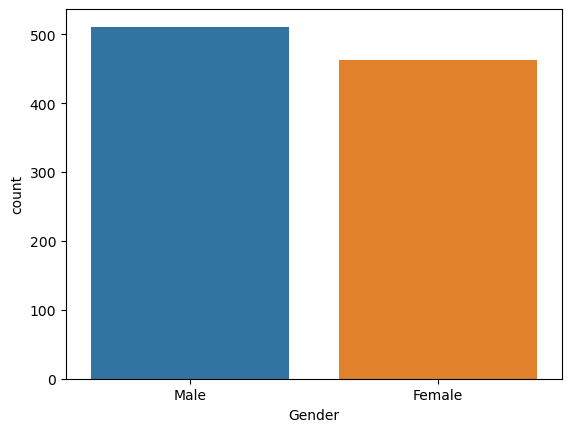

In [29]:
# count plot on single categorical variable
sns.countplot(x ='Gender', data = gym_df)
 
# Show the plot
plt.show()

([<matplotlib.patches.Wedge at 0x17c2a186af0>,
 [Text(0.7399064815196347, 0.8139646175388919, 'Strength'),
  Text(-0.87421790742763, 0.6676399106800431, 'Cardio'),
  Text(-0.6462763807755012, -0.8901274288840444, 'Yoga'),
  Text(0.8316416237556072, -0.7199807008782508, 'HIIT')],
 [Text(0.4035853535561644, 0.44398070047575916, '26.5%\n258'),
  Text(-0.47684613132416176, 0.36416722400729623, '26.2%\n255'),
  Text(-0.3525143895139097, -0.48552405211856964, '24.6%\n239'),
  Text(0.4536227038666948, -0.3927167459335913, '22.7%\n221')])

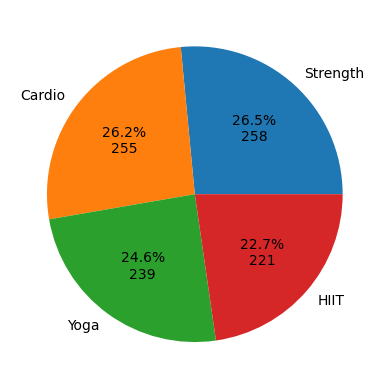

In [10]:
total = gym_df['Workout_Type'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(gym_df['Workout_Type'].value_counts().values, labels=gym_df['Workout_Type'].value_counts().index, autopct=fmt)


([<matplotlib.patches.Wedge at 0x2025a2e0fd0>,
 [Text(0.2826992367429006, 1.0630527463606787, '2'),
  Text(-0.8454325600380445, -0.7037355941172213, '1'),
  Text(0.897373843852857, -0.6361762211594743, '3')],
 [Text(0.15419958367794576, 0.5798469525603701, '41.7%\n406'),
  Text(-0.4611450327480242, -0.3838557786093934, '38.6%\n376'),
  Text(0.48947664210155833, -0.3470052115415314, '19.6%\n191')])

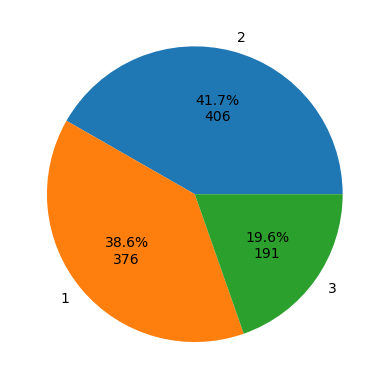

In [11]:
total = gym_df['Experience_Level'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(gym_df['Experience_Level'].value_counts().values, labels=gym_df['Experience_Level'].value_counts().index, autopct=fmt)


([<matplotlib.patches.Wedge at 0x2025a2319a0>,
 [Text(0.41067651052725496, 1.020463033970931, '3'),
  Text(-1.0728144720365962, -0.2430413721752728, '4'),
  Text(0.2998233934346794, -1.0583505717621706, '2'),
  Text(1.0408835528375082, -0.35575473212926717, '5')],
 [Text(0.22400536937850268, 0.5566162003477805, '37.8%\n368'),
  Text(-0.5851715302017797, -0.13256802118651242, '31.4%\n306'),
  Text(0.16354003278255239, -0.5772821300520931, '20.2%\n197'),
  Text(0.5677546651840953, -0.19404803570687298, '10.5%\n102')])

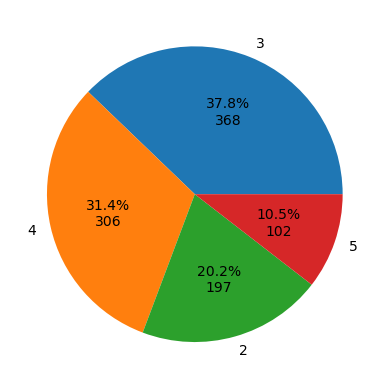

In [13]:
total = gym_df['Workout_Frequency (days/week)'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(gym_df['Workout_Frequency (days/week)'].value_counts().values, labels=gym_df['Workout_Frequency (days/week)'].value_counts().index, autopct=fmt)


### Number data element

In [14]:
gym_df_num=gym_df.select_dtypes(exclude=["object"])


In [15]:
gym_df_num.head(5)

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,88.3,1.71,180,157,60,1.69,1313,12.6,3.5,4,3,30.20
1,46,74.9,1.53,179,151,66,1.30,883,33.9,2.1,4,2,32.00
2,32,68.1,1.66,167,122,54,1.11,677,33.4,2.3,4,2,24.71
3,25,53.2,1.70,190,164,56,0.59,532,28.8,2.1,3,1,18.41
4,38,46.1,1.79,188,158,68,0.64,556,29.2,2.8,3,1,14.39


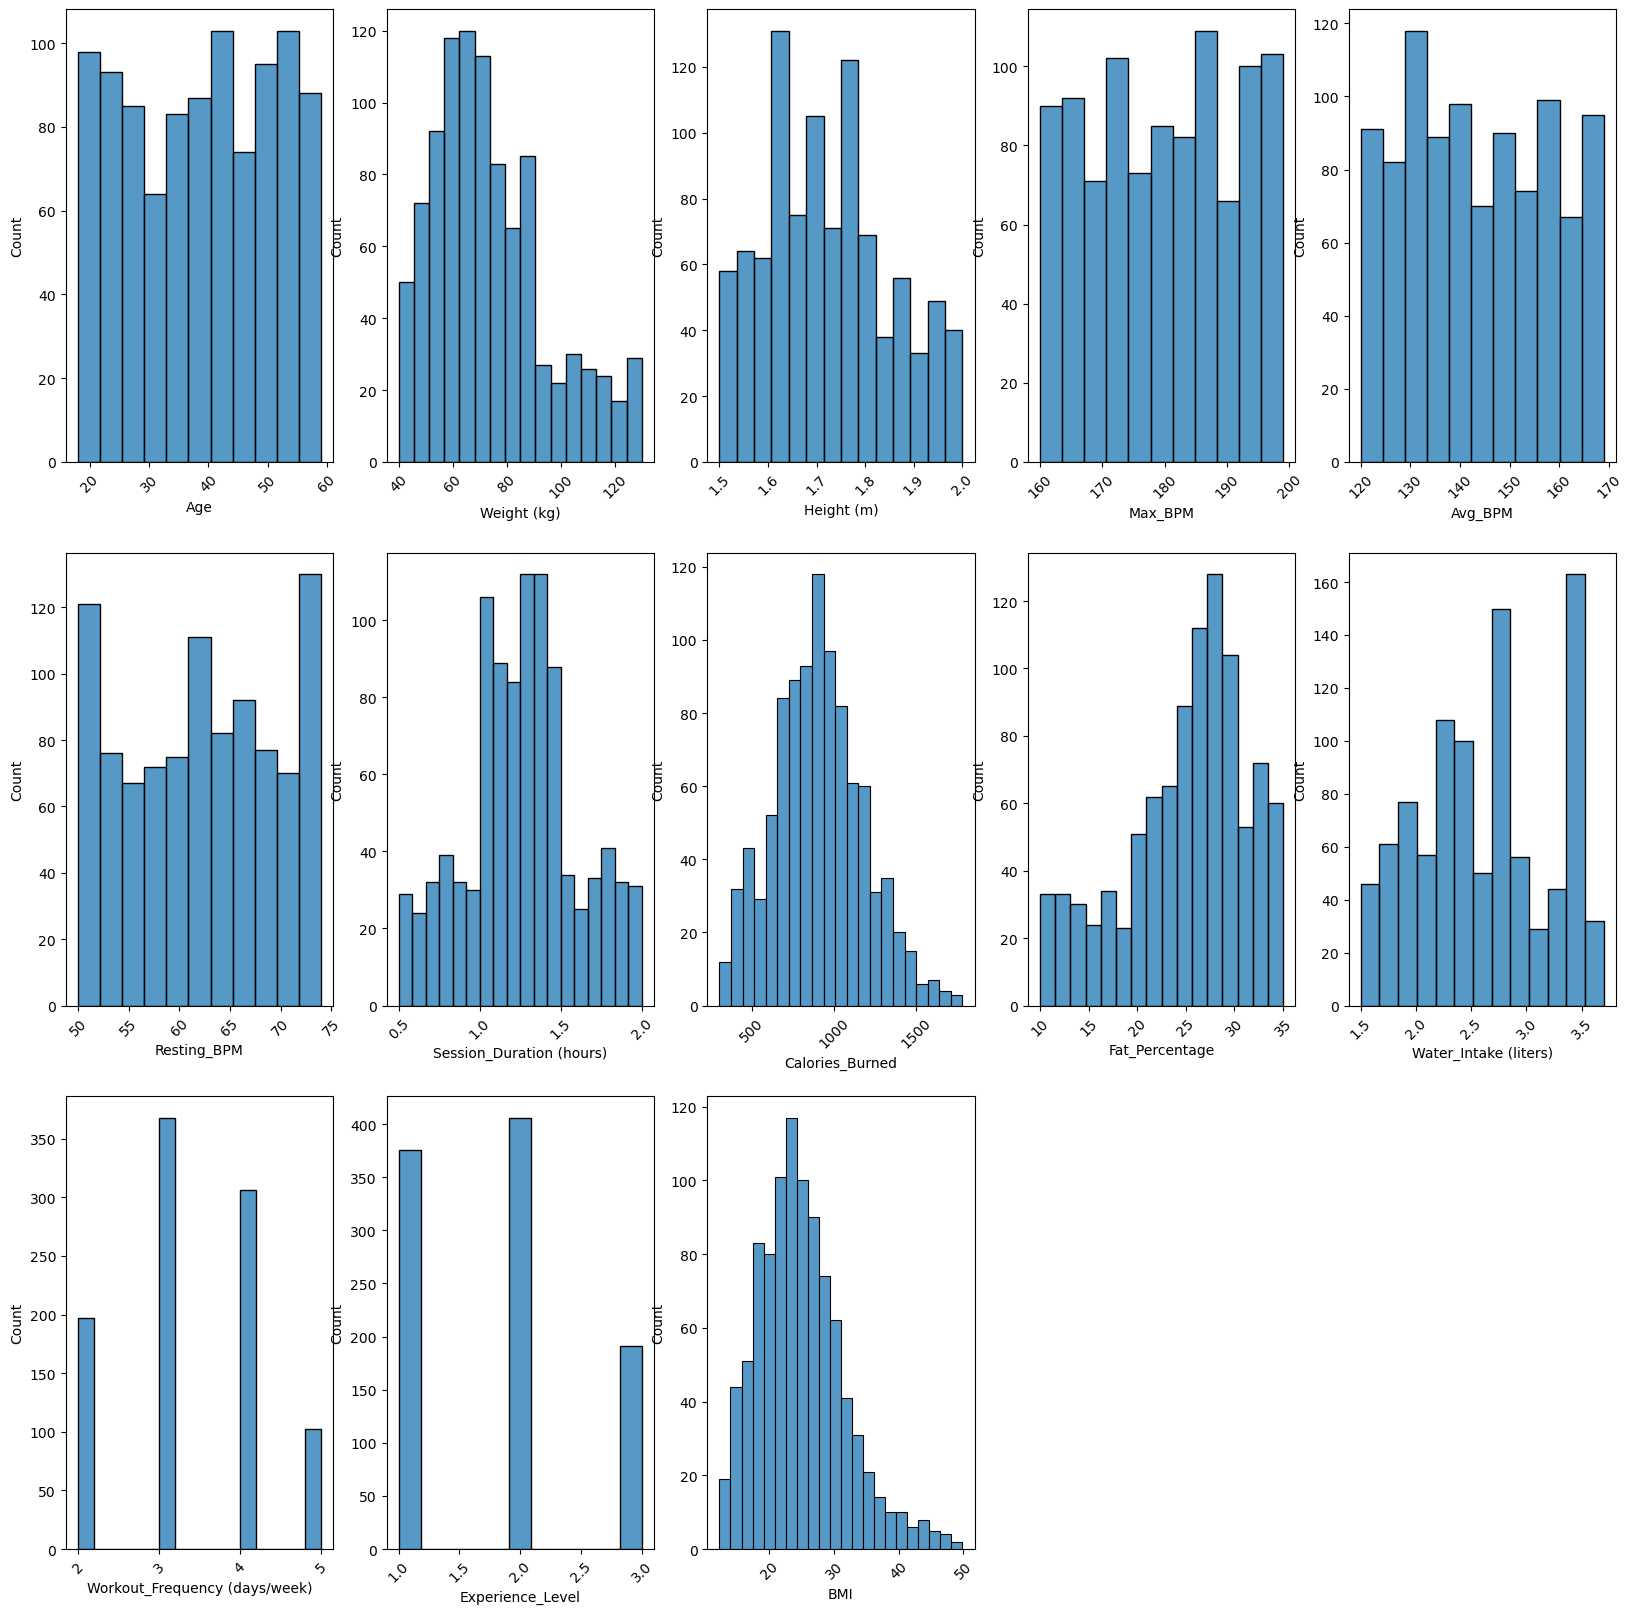

In [16]:
# Histogram of this dataset
plt.figure(figsize = (20, 20))
for i, col in enumerate(gym_df_num.columns, 1):
    plt.subplot(3, 5, i)
    sns.histplot(x = gym_df_num[col])
    plt.xticks(rotation = 45)
    plt.plot()

## Encoding

In [45]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
gym_df_num['Gender']= label_encoder.fit_transform(gym_df['Gender']) 
gym_df_num['Workout_Type']= label_encoder.fit_transform(gym_df['Workout_Type']) 
gym_df_num['Gender'].unique() 



array([1, 0])

In [46]:
gym_df_num.head()


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender,Workout_Type
0,56,88.3,1.71,180,157,60,1.69,1313,12.6,3.5,4,3,30.20,1,3
1,46,74.9,1.53,179,151,66,1.30,883,33.9,2.1,4,2,32.00,0,1
2,32,68.1,1.66,167,122,54,1.11,677,33.4,2.3,4,2,24.71,0,0
3,25,53.2,1.70,190,164,56,0.59,532,28.8,2.1,3,1,18.41,1,2
4,38,46.1,1.79,188,158,68,0.64,556,29.2,2.8,3,1,14.39,1,2


# Detect Outliers
Looking at individual features and identify extreme values using interquartile range (IQR). Difference betweek first and third quartile set of data

In [47]:
# Step 1: Calculate Q1, Q3, and IQR for each numeric column
for coll in gym_df_num.columns:
    if gym_df_num[coll].dtypes in ["int64", "float64"]:
        # Calculate Q1, Q3, and IQR
        Q1 = gym_df_num[coll].quantile(0.25)
        Q3 = gym_df_num[coll].quantile(0.75)
        IQR = Q3 - Q1
        
        # Step 2: Determine the bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Step 3: Identify the outliers
        outliers = gym_df_num[(gym_df_num[coll] < lower_bound) | (gym_df_num[coll] > upper_bound)]
        
        # Print the column name and outliers only if there are outliers
        if not outliers.empty:
            print(f"Outliers in {coll} is:", len(outliers[coll]))
        
        # Step 4: Filter the DataFrame to remove outliers
        #df_no_outliers = df[(df[coll] >= lower_bound) & (df[coll] <= upper_bound)]

Outliers in Weight (kg) is: 9
Outliers in Calories_Burned is: 10
Outliers in BMI is: 25


# 2. Apply a standard scalar to the data.
This class implements a type of feature scaling called standardization. Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1:


In [50]:
from sklearn import preprocessing

In [52]:
scaler = preprocessing.StandardScaler()
scaled_feature = scaler.fit_transform(gym_df_num.values)

Validate Data

In [53]:
gym_df_scaled = pd.DataFrame(scaled_feature, index=gym_df_num.index, columns=gym_df_num.columns)
gym_df_scaled.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender,Workout_Type
0,1.422343,0.681493,-0.098545,0.010081,0.922970,-0.303555,1.264598,1.495690,-1.978321,1.455967,0.743295,1.609784,0.794278,0.950847,1.338485
1,0.600965,0.049316,-1.508604,-0.076726,0.504494,0.515749,0.127098,-0.082284,1.426301,-0.877898,0.743295,0.257176,1.064652,-1.051694,-0.439462
2,-0.548964,-0.271491,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,-0.838243,1.346380,-0.544488,0.743295,0.257176,-0.030361,-1.051694,-1.328435
3,-1.123928,-0.974433,-0.176881,0.878155,1.411193,-0.849757,-1.943735,-1.370351,0.611110,-0.877898,-0.352502,-1.095432,-0.976669,0.950847,0.449512
4,-0.056137,-1.309393,0.528148,0.704540,0.992716,0.788850,-1.797902,-1.282278,0.675047,0.289035,-0.352502,-1.095432,-1.580503,0.950847,0.449512


# 3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.


In [60]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA


This loops through values of k (2-15)  and compute the silhouette coefficient:

In [61]:
range_n_clusters = list(range(2, 15))
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(gym_df_scaled)
 cluster_labels = kmeans.labels_
 
 # silhouette score df_als_scaled features
 silhouette_avg.append(silhouette_score(gym_df_scaled, cluster_labels))


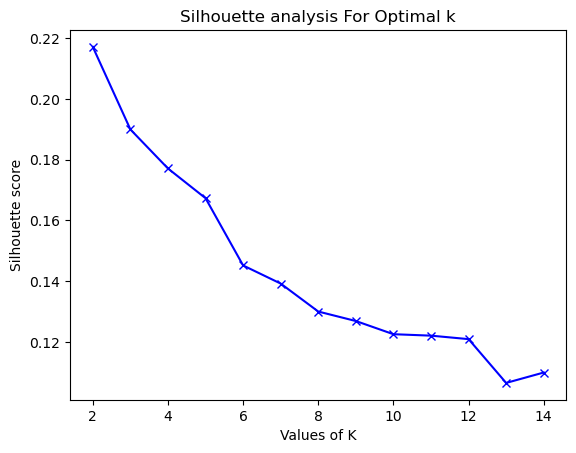

In [62]:
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# 4. Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.

  
 Plotting the average silhouette scores for each k shows that the best choice for <b>  k is 3 </b>  since it has the highest silhouette score:


# 5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).


The Red and Blue clusters below seem to have overlap and the not clearly separated even when using the k = 2

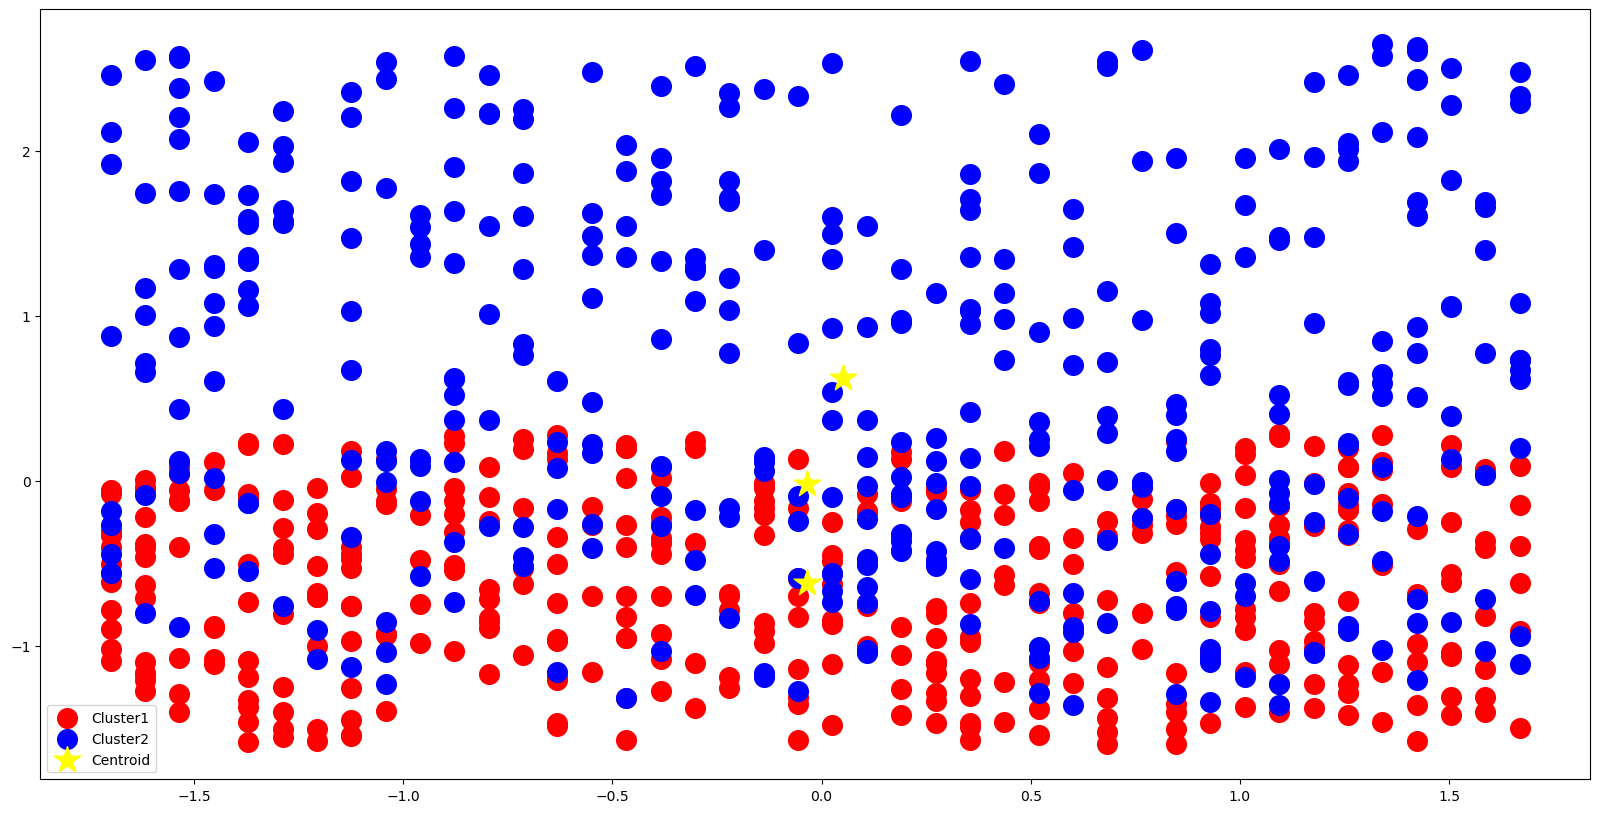

In [63]:
Kmeans = KMeans(n_clusters = 3,                 # Set to optimal cluster =2 
                init = 'k-means++',             # Initialization 
                max_iter = 300,                 # Maximum num of iterations
                n_init = 10,                    #  how often algorithm will run with different centroid
                random_state = 0)               # Random state for reproducibility

y_Kmeans = Kmeans.fit_predict(scaled_feature)

plt.figure(figsize = (20,10))

#Plot the clusters and centroids
plt.scatter(scaled_feature[y_Kmeans == 0, 0], 
            scaled_feature[y_Kmeans == 0, 1], 
            s = 200, c = 'red', label = 'Cluster1')
plt.scatter(scaled_feature[y_Kmeans == 1, 0],
            scaled_feature[y_Kmeans == 1, 1], 
            s = 200, c = 'blue', label = 'Cluster2')

plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], 
            s=400,                             
            c='yellow',
            label = 'Centroid',
            marker = "*")                         

plt.legend()
plt.show()

In [64]:
score = silhouette_score(scaled_feature, y_Kmeans, metric='euclidean')
print(score)

0.18992114344757827


# 6. Fit a PCA transformation with two features to the scaled data.

Perform PCA with the chosen number of components=2


In [99]:
scaled_pca = PCA(n_components=2).fit(gym_df_scaled.values)
scaled_pca_feature = scaled_pca.transform(gym_df_scaled.values)

In [102]:
scaled_pca_feature

array([[ 3.75072916,  0.345011  ],
       [-0.77014709, -1.14297768],
       [-1.30344165, -0.96815231],
       ...,
       [ 1.8396793 , -1.98774611],
       [ 0.19837808,  2.57844467],
       [-1.56238324,  2.58459878]])

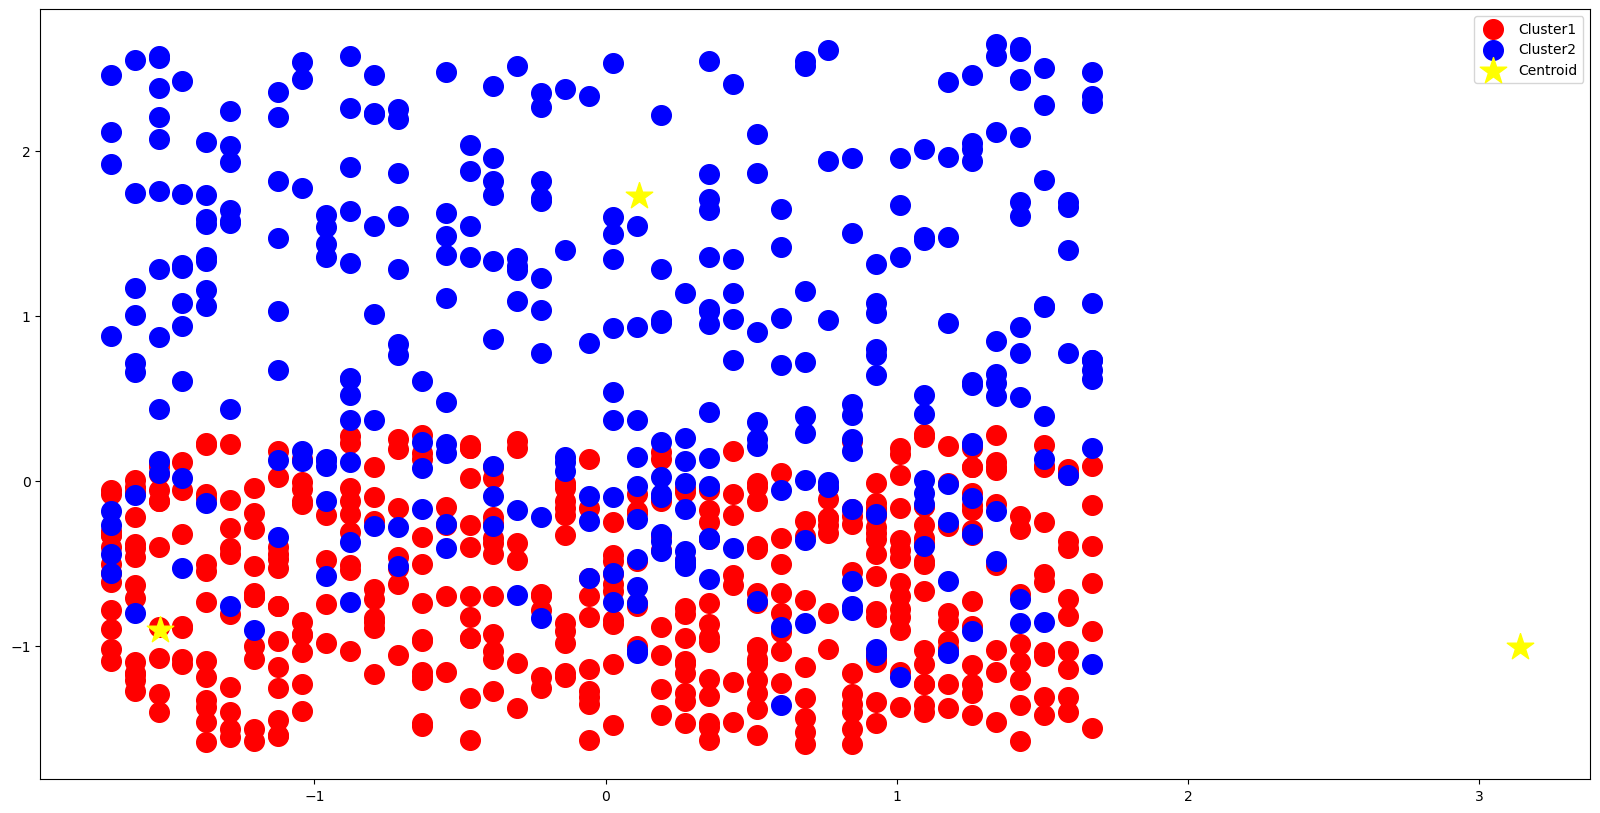

In [107]:
Kmeans = KMeans(n_clusters = 3,                 # Set to optimal cluster =2 
                init = 'k-means++',             # Initialization 
                max_iter = 300,                 # Maximum num of iterations
                n_init = 10,                    #  how often algorithm will run with different centroid
                random_state = 0)               # Random state for reproducibility

y_Kmeans = Kmeans.fit_predict(scaled_pca_feature)

plt.figure(figsize = (20,10))

#Plot the clusters and centroids
plt.scatter(scaled_feature[y_Kmeans == 0, 0], 
            scaled_feature[y_Kmeans == 0, 1], 
            s = 200, c = 'red', label = 'Cluster1')
plt.scatter(scaled_feature[y_Kmeans == 1, 0],
            scaled_feature[y_Kmeans == 1, 1], 
            s = 200, c = 'blue', label = 'Cluster2')

plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], 
            s=400,                             
            c='yellow',
            label = 'Centroid',
            marker = "*")                         

plt.legend()
plt.show()

## Classification

In [20]:
gym_df_num.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender,Workout_Type
0,1.422343,0.681493,-0.098545,0.010081,0.922970,-0.303555,1.264598,1.495690,-1.978321,1.455967,0.743295,1.609784,0.794278,1,3
1,0.600965,0.049316,-1.508604,-0.076726,0.504494,0.515749,0.127098,-0.082284,1.426301,-0.877898,0.743295,0.257176,1.064652,0,1
2,-0.548964,-0.271491,-0.490228,-1.118414,-1.518142,-1.122858,-0.427068,-0.838243,1.346380,-0.544488,0.743295,0.257176,-0.030361,0,0
3,-1.123928,-0.974433,-0.176881,0.878155,1.411193,-0.849757,-1.943735,-1.370351,0.611110,-0.877898,-0.352502,-1.095432,-0.976669,1,2
4,-0.056137,-1.309393,0.528148,0.704540,0.992716,0.788850,-1.797902,-1.282278,0.675047,0.289035,-0.352502,-1.095432,-1.580503,1,2


NameError: name 'df' is not defined

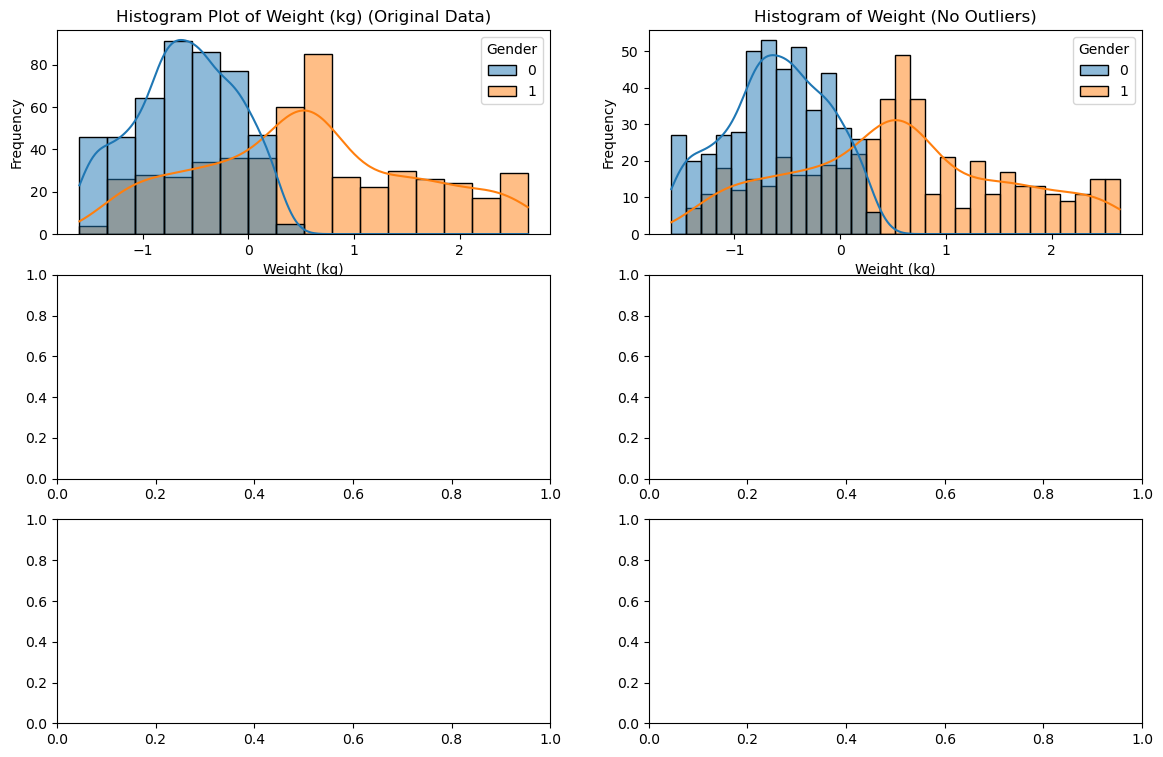

In [23]:
# Create a figure with 3 rows and 2 columns to accommodate more plots
fig, axs = plt.subplots(3, 2, figsize=(14, 9))

# Plot 1: Histogram plot for the original "Weight (kg)"
sns.histplot(data=gym_df_num, x="Weight (kg)", hue="Gender", ax=axs[0, 0], kde=True)
axs[0, 0].set_title('Histogram Plot of Weight (kg) (Original Data)')
axs[0, 0].set_xlabel('Weight (kg)')
axs[0, 0].set_ylabel('Frequency')

# Plot 2: Histogram for the No Outliers "Weight (kg)"
sns.histplot(data=gym_df_num, x="Weight (kg)", bins=30, kde=True, hue="Gender", ax=axs[0, 1])
axs[0, 1].set_title('Histogram of Weight (No Outliers)')
axs[0, 1].set_xlabel('Weight (kg)')
axs[0, 1].set_ylabel('Frequency')

# Plot 3: Histogram plot for "BMI" (with no outliers)
sns.histplot(data=df, x="BMI", hue="Gender", ax=axs[1, 0], kde=True)
axs[1, 0].set_title('Histogram Plot of BMI (Original Data)')
axs[1, 0].set_xlabel('BMI')
axs[1, 0].set_ylabel('Frequency')

# Plot 4: Histogram for "BMI" (No Outliers)
sns.histplot(data=df_no_outliers, x="BMI", bins=30, kde=True, hue="Gender", ax=axs[1, 1])
axs[1, 1].set_title('Histogram of BMI (No Outliers)')
axs[1, 1].set_xlabel('BMI')
axs[1, 1].set_ylabel('Frequency')

# Additional Plot 5: Histogram plot for "Calories_Burned" 
sns.histplot(data=df, x="Calories_Burned", hue="Gender", ax=axs[2, 0], kde=True)
axs[2, 0].set_title('Histogram Plot of Calories Burned (Original Data)')
axs[2, 0].set_xlabel('Calories Burned')
axs[2, 0].set_ylabel('Frequency')

# Additional Plot 6: Histogram for "Calories_Burned" (No Outliers)
sns.histplot(data=df_no_outliers, x="Calories_Burned", bins=30, kde=True, hue="Gender", ax=axs[2, 1])
axs[2, 1].set_title('Histogram of Calories Burned (No Outliers)')
axs[2, 1].set_xlabel('Calories Burned')
axs[2, 1].set_ylabel('Frequency')

# Adjust layout to avoid overlapping of titles and labels
plt.tight_layout()
plt.show()

In [24]:
# Step 1: Calculate Q1, Q3, and IQR for each numeric column
for coll in df.columns:
    if df[coll].dtypes in ["int64", "float64"]:
        # Calculate Q1, Q3, and IQR
        Q1 = df[coll].quantile(0.25)
        Q3 = df[coll].quantile(0.75)
        IQR = Q3 - Q1
        
        # Step 2: Determine the bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Step 3: Identify the outliers
        outliers = df[(df[coll] < lower_bound) | (df[coll] > upper_bound)]
        
        # Print the column name and outliers only if there are outliers
        if not outliers.empty:
            print(f"Outliers in {coll} is:", len(outliers[coll]))
        
        # Step 4: Filter the DataFrame to remove outliers
        df_no_outliers = df[(df[coll] >= lower_bound) & (df[coll] <= upper_bound)]

NameError: name 'df' is not defined

# Identify a question or question(s) that you would like to explore in your data set.


In [38]:
 gym_df["Age"].describe()

count    973.000000
mean      38.683453
std       12.180928
min       18.000000
25%       28.000000
50%       40.000000
75%       49.000000
max       59.000000
Name: Age, dtype: float64

In [11]:
gym_df["Gender"].value_counts()

Male      511
Female    462
Name: Gender, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


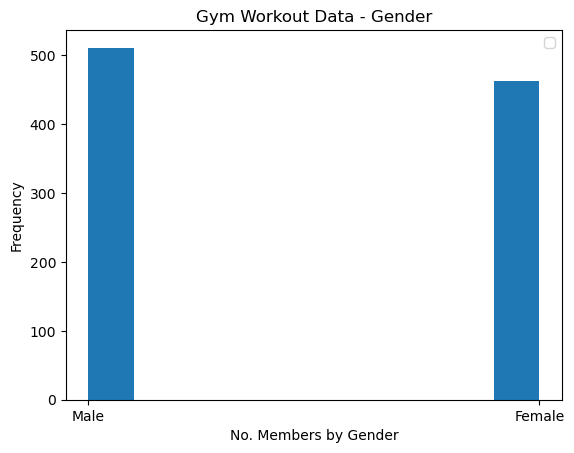

In [14]:
# Create Histogram
plt.hist([gym_df['Gender']], bins=10)
plt.legend(loc='upper right')
plt.title("Gym Workout Data - Gender")
plt.xlabel("No. Members by Gender", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.show()

In [9]:
corr = gym_df.corr().round(2)
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
Age,1.000000,-0.040000,-0.030000,-0.020000,0.040000,0.000000,-0.020000,-0.150000,0.000000,0.040000,0.010000,-0.020000,-0.010000
Weight (kg),-0.040000,1.000000,0.370000,0.060000,0.010000,-0.030000,-0.010000,0.100000,-0.230000,0.390000,-0.010000,0.000000,0.850000
Height (m),-0.030000,0.370000,1.000000,-0.020000,-0.010000,-0.010000,-0.010000,0.090000,-0.240000,0.390000,-0.010000,-0.010000,-0.160000
Max_BPM,-0.020000,0.060000,-0.020000,1.000000,-0.040000,0.040000,0.010000,0.000000,-0.010000,0.030000,-0.030000,0.000000,0.070000
Avg_BPM,0.040000,0.010000,-0.010000,-0.040000,1.000000,0.060000,0.020000,0.340000,-0.010000,-0.000000,-0.010000,-0.000000,0.020000
Resting_BPM,0.000000,-0.030000,-0.010000,0.040000,0.060000,1.000000,-0.020000,0.020000,-0.020000,0.010000,-0.010000,0.000000,-0.030000
Session_Duration (hours),-0.020000,-0.010000,-0.010000,0.010000,0.020000,-0.020000,1.000000,0.910000,-0.580000,0.280000,0.640000,0.760000,-0.010000
Calories_Burned,-0.150000,0.100000,0.090000,0.000000,0.340000,0.020000,0.910000,1.000000,-0.600000,0.360000,0.580000,0.690000,0.060000
Fat_Percentage,0.000000,-0.230000,-0.240000,-0.010000,-0.010000,-0.020000,-0.580000,-0.600000,1.000000,-0.590000,-0.540000,-0.650000,-0.120000
Water_Intake (liters),0.040000,0.390000,0.390000,0.030000,-0.000000,0.010000,0.280000,0.360000,-0.590000,1.000000,0.240000,0.300000,0.210000


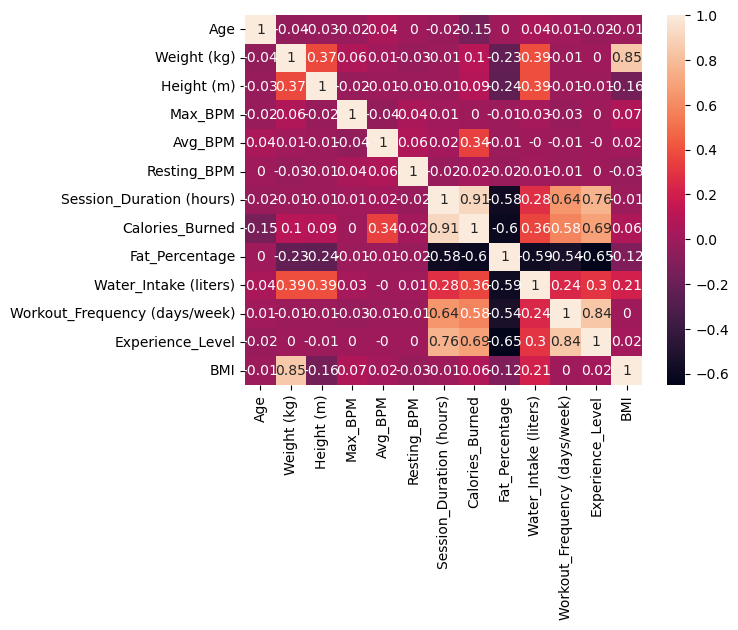

In [7]:
matrix = gym_df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

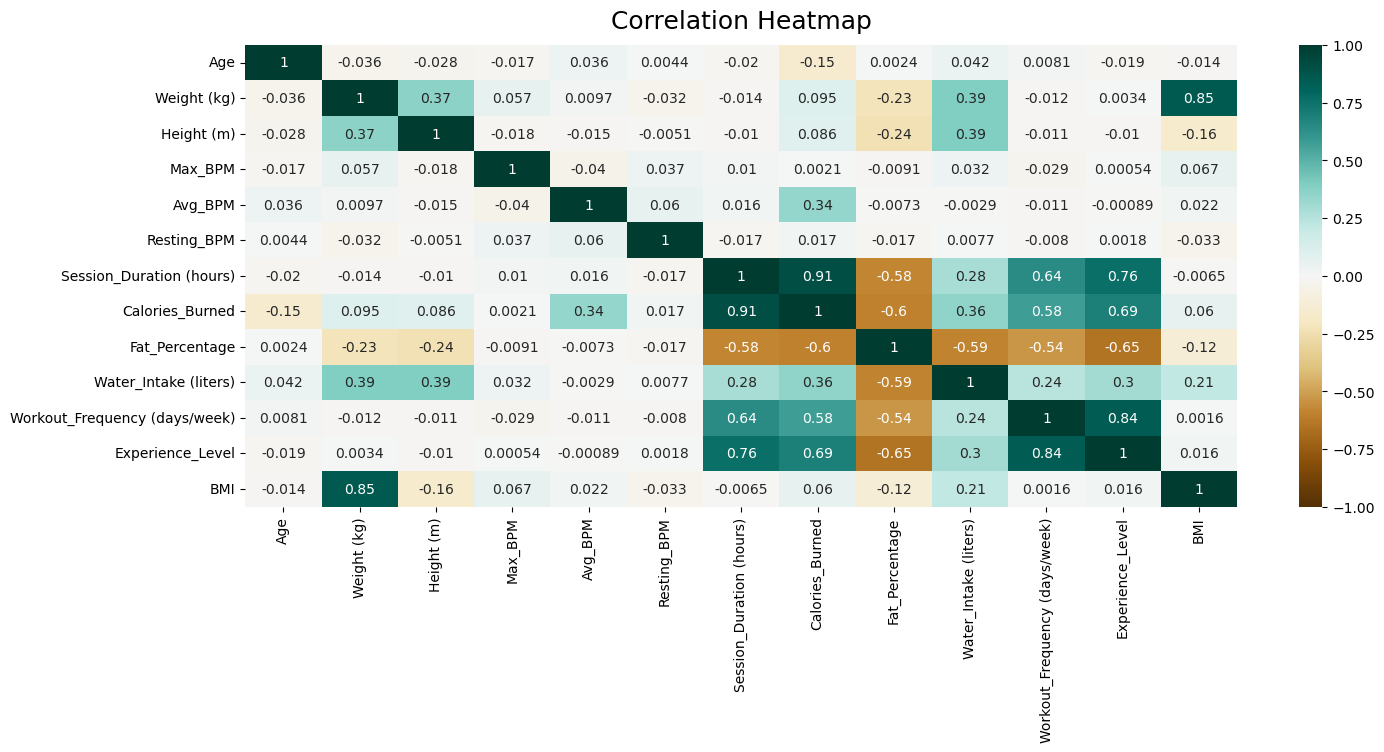

In [10]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(gym_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [ ]:
# Feature Extraction PCA

In [25]:
x = gym_df_num.drop('Calories_Burned', axis = 1)
y = gym_df_num['Calories_Burned']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [29]:
import statsmodels.api as sm

# Assuming `X` is your feature matrix (encoded and standardized), and `y` is your target variable

# Step 1: Add a constant (intercept) to the feature matrix
x_train_const = sm.add_constant(x_train)  # Adds the intercept
x_test_const = sm.add_constant(x_test)  # Adds the intercept

# Step 2: Fit the OLS model
ols_model = sm.OLS(y_train, x_train_const).fit()

# Step 3: Output the summary of the model
print(ols_model.summary())

# Optional: Predict using the model if needed
y_pred = ols_model.predict(x_test_const)

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2527.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:07:09   Log-Likelihood:                 409.13
No. Observations:                 778   AIC:                            -788.3
Df Residuals:                     763   BIC:                            -718.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [30]:
y_test.head(5)


199    0.086523
538    1.818624
174    0.071844
464    0.915876
66     2.501190
Name: Calories_Burned, dtype: float64

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [32]:
mse = mean_squared_error(y_test,y_pred)
print('Mean square error = ',mse)

Mean square error =  0.022084250637814253


In [33]:
mae = mean_absolute_error(y_test,y_pred)
print('Mean absolute error = ',mae)

Mean absolute error =  0.1108855215655197


In [34]:
rmse = mse**0.5
rmse
print('Root Mean square error = ',rmse)

Root Mean square error =  0.14860770719519983


In [66]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
numerical_features = gym_df_num.select_dtypes(include=["int64","float64"]).columns
label_encoders = {}
for column in ['Gender', 'Workout_Type', 'Experience_Level']:
    le = LabelEncoder()
    gym_df_num[column] = le.fit_transform(gym_df_num[column])
    label_encoders[column] = le

# Normalize numerical features
scaler = StandardScaler()
gym_df_num[numerical_features] = scaler.fit_transform(gym_df_num[numerical_features])

# Step 3: Split the dataset
# Choose a target variable. Here, let's assume we're predicting 'Calories_Burned'
X = gym_df_num.drop(columns=['Calories_Burned'])  # Features
y = gym_df_num['Calories_Burned']                  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Linear Regression model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R^2 Score: {r2}')
print(f'Mean Squared Error: {mse}')

R^2 Score: 0.9944532429938772
Mean Squared Error: 0.006231578746145337


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [94]:
X = gym_df_scaled.drop(columns=['Calories_Burned'])  # Features
y = gym_df_scaled['Calories_Burned']                  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Creating the Linear Regression Model
Linear_Model = LinearRegression()

# Fit the model on the training data
Linear_Model.fit(X_train, y_train) # Trains the linear regression model on the training data.

# Make predictions on the test data set
y_pred = Linear_Model.predict(X_test) # Generates predictions for the test data.

# Evaluate the model performance
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE)", mse_linear) # Measures the average squared difference between predicted and actual values (the lower, the better)
print("R-squared (R²):", r2_linear) # Indicates how well the model explains the variance in the target variable (closer to 1 is better)

Mean Squared Error (MSE) 0.022084250637814315
R-squared (R²): 0.9803427065691752


In [79]:
Linear_Model.coef_

array([-0.14817397, -0.08022136,  0.05150138,  0.00444431,  0.32404721,
        0.01620777,  0.89705548, -0.01419088, -0.00796104,  0.0137094 ,
       -0.01020968,  0.08382084,  0.15174836, -0.00987676])

In [88]:
coef_dict={}
for coef, feat in zip (Linear_Model.coef_, gym_df_num.iloc[:,1:].columns):
    coef_dict[feat] = coef
coef_dict

{'Weight (kg)': -0.14817396808999483,
 'Height (m)': -0.08022135590340186,
 'Max_BPM': 0.05150138040743116,
 'Avg_BPM': 0.004444305782613877,
 'Resting_BPM': 0.32404721109369605,
 'Session_Duration (hours)': 0.016207770329568993,
 'Calories_Burned': 0.8970554836066339,
 'Fat_Percentage': -0.01419088453909179,
 'Water_Intake (liters)': -0.007961036894713938,
 'Workout_Frequency (days/week)': 0.01370940015051987,
 'Experience_Level': -0.010209675191067883,
 'BMI': 0.08382083587814798,
 'Gender': 0.15174836417683413,
 'Workout_Type': -0.009876764920427676}

## Other Regression

In [95]:
# Dictionary of models with parameters to evaluate performance
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=5, min_samples_split=10),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    'KNeighbors Regressor': KNeighborsRegressor(n_neighbors=5, weights='uniform'),
    'XG Regressor': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}


In [96]:

# Initialize variables to track the best model
best_model_name = None
best_model = None
best_r2_score = -float('inf')

# Train, predict, and evaluate each model
model_score = []
for name, model in models.items():
    model.fit(X_train, y_train)  

    # Make predictions from each model
    y_pred = model.predict(X_test)  

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store metrics in the list
    model_score.append((name, mse, r2, mae))

    # Print the performance metrics
    print(f"{name} - MSE: {mse}")
    print(f"{name} - R²: {r2}")
    print(f"{name} - MAE: {mae}\n")

    # Update the best model if current model's R² score is higher
    if r2 > best_r2_score:
        best_r2_score = r2
        best_model_name = name
        best_model = model

print(f"Best Model: {best_model_name} with R² score of {best_r2_score}")

Linear Regression - MSE: 0.022084250637814287
Linear Regression - R²: 0.9803427065691752
Linear Regression - MAE: 0.1108855215655197

Decision Tree Regressor - MSE: 0.10700203627035405
Decision Tree Regressor - R²: 0.904756993607899
Decision Tree Regressor - MAE: 0.25580858015144636

Random Forest Regressor - MSE: 0.06000492646952599
Random Forest Regressor - R²: 0.9465893379743276
Random Forest Regressor - MAE: 0.18936402445671355

KNeighbors Regressor - MSE: 0.18617293477227165
KNeighbors Regressor - R²: 0.8342866114084933
KNeighbors Regressor - MAE: 0.3403756031408126

XG Regressor - MSE: 0.006573868328471966
XG Regressor - R²: 0.9941485694566828
XG Regressor - MAE: 0.06048288833042959

Best Model: XG Regressor with R² score of 0.9941485694566828


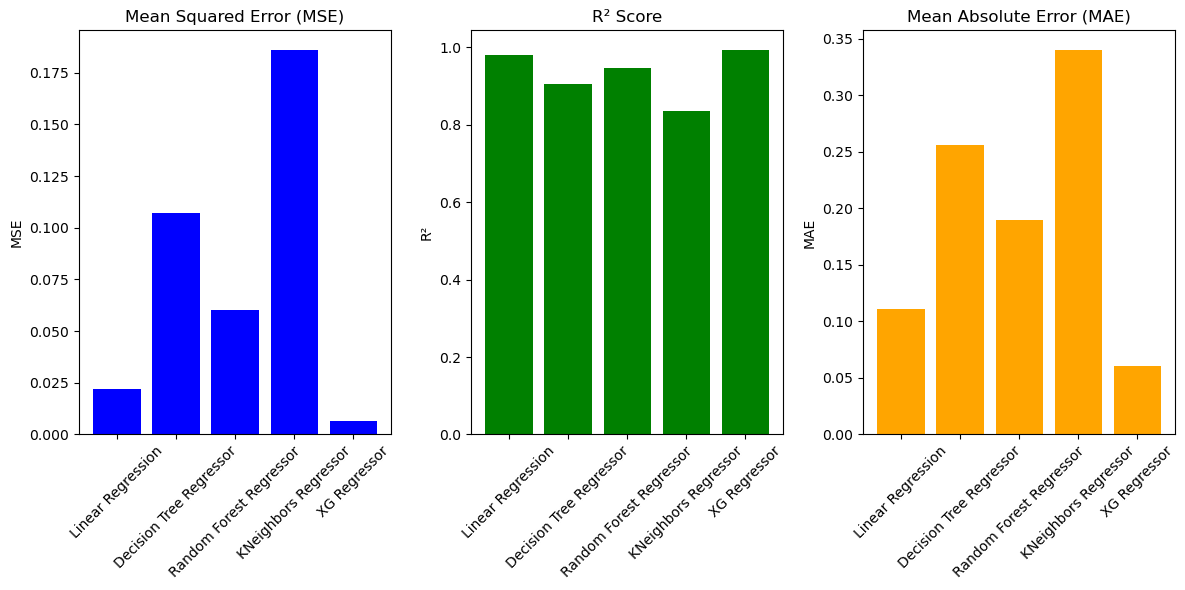

In [97]:
# Plotting the results
model_names = [score[0] for score in model_score]
mse_values = [score[1] for score in model_score]
r2_values = [score[2] for score in model_score]
mae_values = [score[3] for score in model_score]

x = range(len(model_names))

plt.figure(figsize=(12, 6))

# Create bar plots for each metric
plt.subplot(1, 3, 1)
plt.bar(x, mse_values, color='blue')
plt.xticks(x, model_names, rotation=45)
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.bar(x, r2_values, color='green')
plt.xticks(x, model_names, rotation=45)
plt.title('R² Score')
plt.ylabel('R²')

plt.subplot(1, 3, 3)
plt.bar(x, mae_values, color='orange')
plt.xticks(x, model_names, rotation=45)
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()